# Multiclass classification on Wine

The popularity of wine has been decreasing recently, and maybe unjustly so. It may come across as a snobbish version of beer but is in fact a drink for the masses (or was that in the middle ages). Let's reminiscence about this topic for a while. Perhaps even enjoying a glass, or a bottle?

You might need it after too much data and code flung at your head in high speed.

## Load the dataset

Once again this dataset can easily be downloaded from sklearn.

In [68]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine(as_frame=True)
df = pd.concat([wine.data, wine.target.rename("target")], axis=1)

## Explore

Let's do some graphs to explore the dataset first.

Show the class distribution. This means counting the amount of different values in the column 'target'. This is most easily done by using a [seaborn countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html).

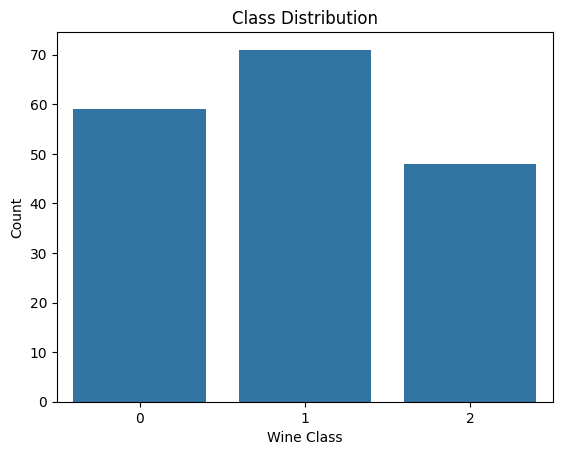

In [69]:
#DELETE

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="target", data=df)
plt.title("Class Distribution")
plt.xlabel("Wine Class")
plt.ylabel("Count")
plt.show()


Next up is a very nice plot: try the [seaborn pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for "alcohol", "malic_acid", "color_intensity" and "hue". Set the "hue" of the graph to our 'target' column.

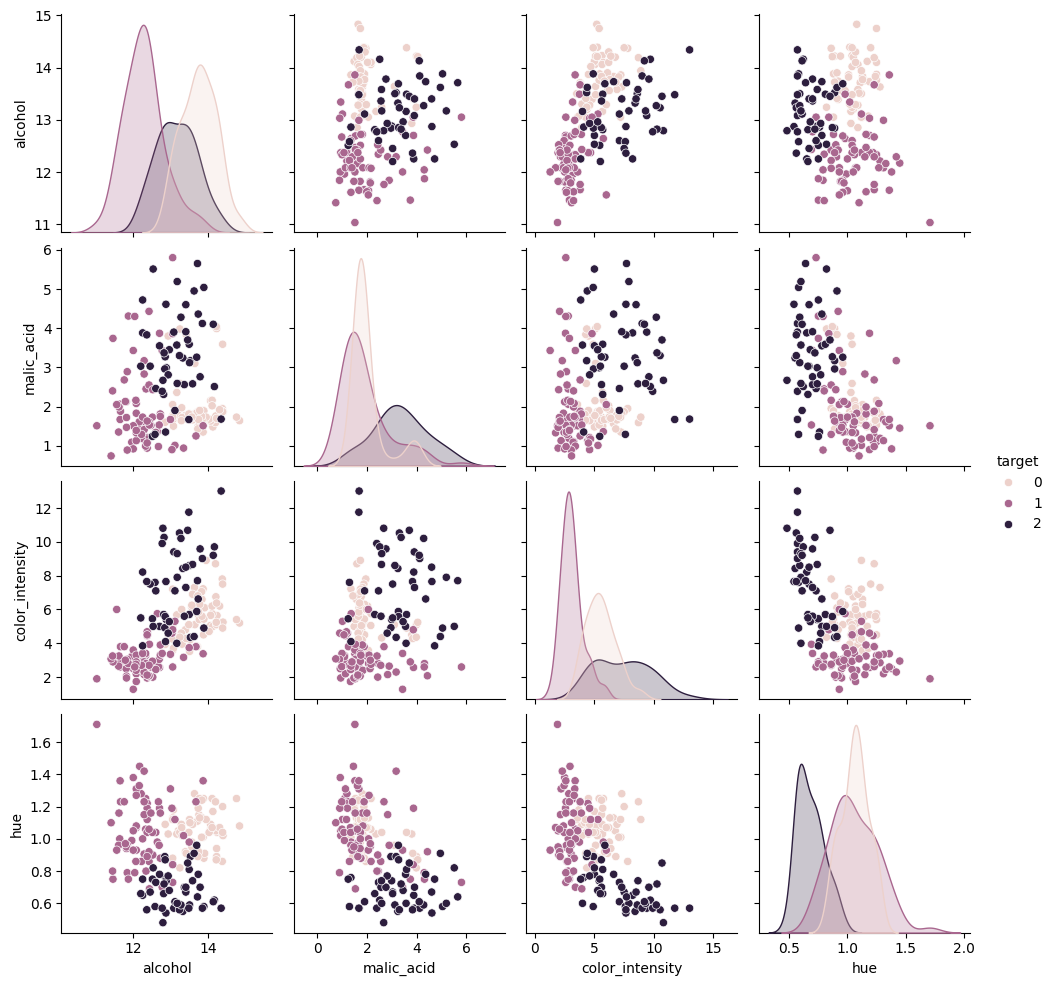

In [70]:
#DELETE
sns.pairplot(df, hue="target", vars=["alcohol", "malic_acid", "color_intensity", "hue"])

You'll get a 4x4 matrix. In the center diagonal you'll see the distibutions of the data in a certain wine-type. Ideally speaking these are three completely separate normal distributions, but that isn't always the case. The further the peaks are apart (and the less the monuntains overlap), the better this feature will be at distinguishing (and predicting) our wine type.

At the intersection of two types of characterstics we see a scatter plot. These dot's are also colored in the wine type. The same goes here: the further the colors are apart, the better this combination of data will be to predict!

Don't worry if there's no real separation though. We are looking at 2D-data, but the computer can use many more dimensions, even if we can't imagine them anymore (or draw them on nice graphs).

Datavisualisation is a lot about simplifying the data - showing the underlying truth without the noise. And one of the best plots for simplifying is the boxplot.

For "alcohol", "malic_acid", "color_intensity" and "proline", draw the boxplots for the three different types of wine.

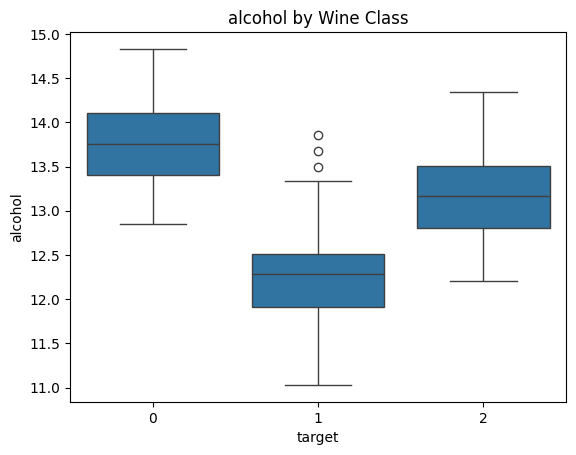

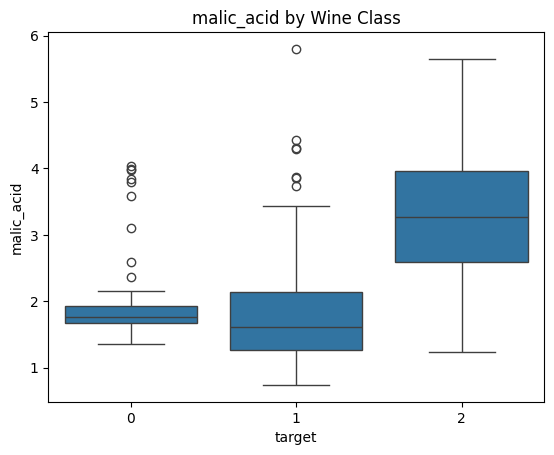

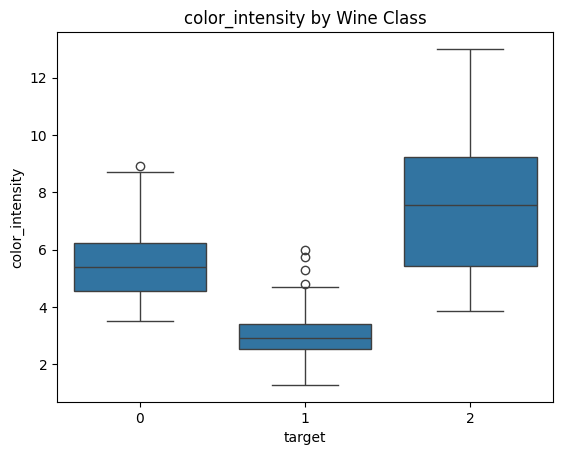

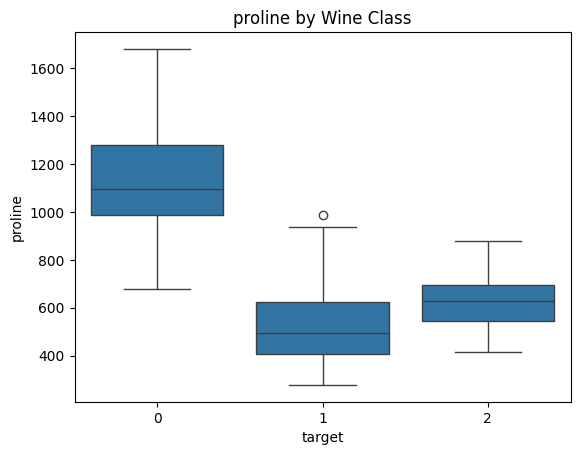

In [71]:
#DELETE
features = ["alcohol", "malic_acid", "color_intensity", "proline"]
for col in features:
    sns.boxplot(x="target", y=col, data=df)
    plt.title(f"{col} by Wine Class")
    plt.show()


Some skewing, some outliers, but nothing too exciting.

A very interesting graph is the correlation matrix. It shows in what measure the different feature move together (e.g. one goes up, to other goes up to) (or also: one goes up, the other goes down). It's mainly interesting once we get started on feature selection, because a bunch of closely related features is dangerous for the model.

Draw a seaborn-heatmap about all data except for the target column.

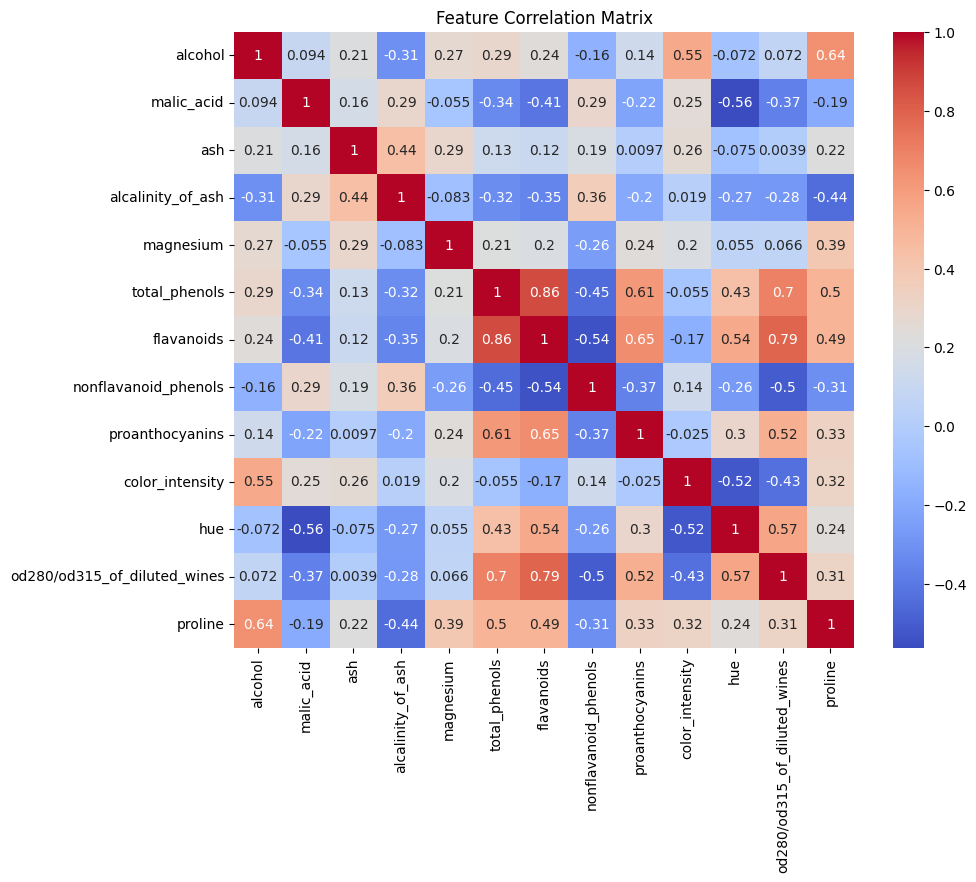

In [72]:
#DELETE
corr = df.drop("target", axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


Some strong correlations (flavanoids and od280/od315_of...), also negative (hue and malic_acid). We left out the target column because it is categorical, where a correlation assumes numeric, continuous variables. Applying it directly to a categorical target can be:

- Misleading (especially if the classes are just codes without numerical meaning).
- Statistically inappropriate unless you encode the target in a meaningful way.

At this point we're just exploring the data, meaning want to understand how features relate to each other, independently of the target. This helps detect:

- Redundancies or high multicollinearity (e.g. if two features are strongly correlated, one might be dropped).
- Underlying structure or clusters in the data.


## Predicting

Let's try to predict the wine type by using a decision tree. (We'll go over decision trees in the next chapter. Now we just need some results to assess if this decision tree is any good at predicting wine type.) We've already loaded the data, but concatted it into one dataframe. Now we need to split it again. We'll also be needing a train/test-split.

In [73]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report
)

import matplotlib.pyplot as plt

# Load the dataset
# wine = load_wine() -> already loaded in first cell
X = wine.data
y = wine.target
feature_names = wine.feature_names
class_names = wine.target_names

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a decision tree classifier using a max depth of 4 and the normal random state (42). Predict and print a confusion matrix and a classification report!

In [74]:
#DELETE
# Train a Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)  # keep it shallow for interpretability
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_names))


[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]
              precision    recall  f1-score   support

     class_0       0.93      0.93      0.93        14
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



Looking good. Our precision is fine and the confusion matrix shows no real problems (only 2 false predictions).

We can visualize the tree itself using "plot_tree".

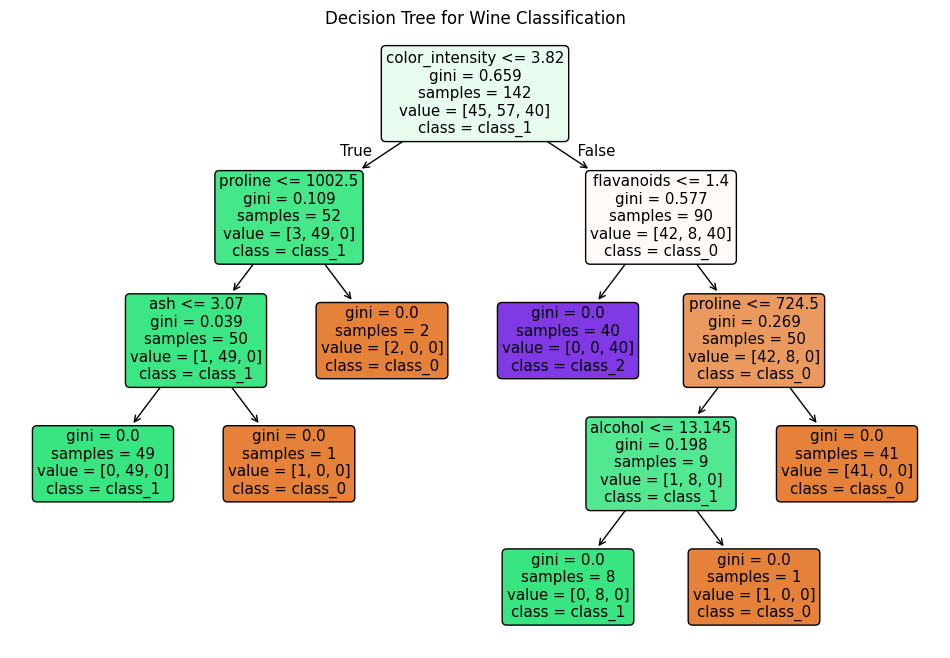

In [75]:
#DELETE
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.title("Decision Tree for Wine Classification")
plt.show()

When choosing a model there's a tradeoff between understandability and quality. A neural network is normally a very good model, but it can't be explained by humans. A decision tree is generally speaking not the best of models (it is in our case, but that's because the dataset is not too hard) but you could explain it to a 10-year old.

Funniest thing: split the data again using a random state of 24, retrain the model and show the decision tree again.

Note: make sure to use another name for your X and Y variables as we'll be getting back to the original model later on.

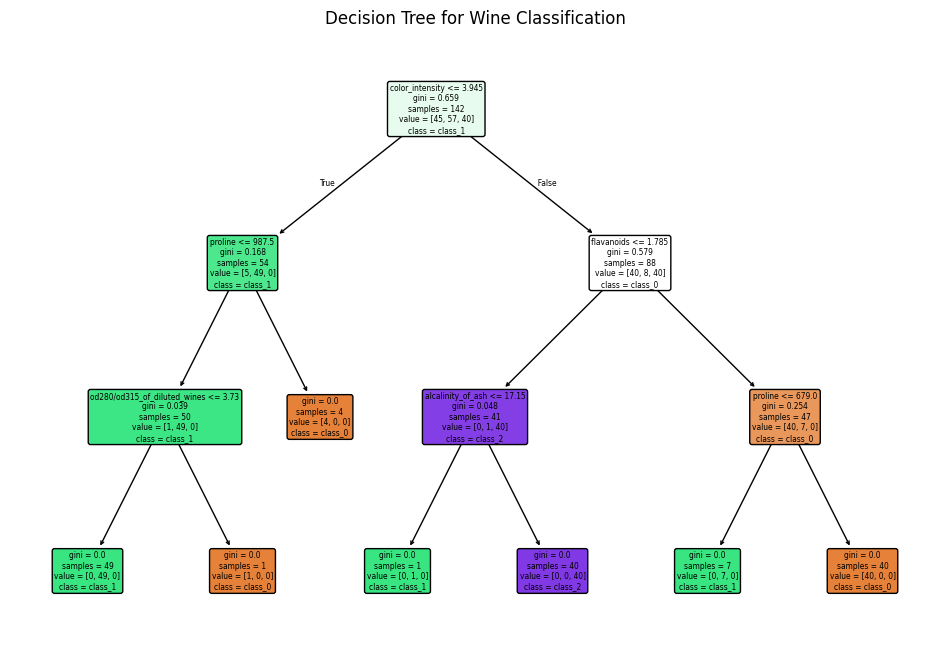

In [76]:
#DELETE
X_train_24, X_test_24, y_train_24, y_test_24 = train_test_split(X, y, test_size=0.2, random_state=24)

# Train a Decision Tree
clf_24 = DecisionTreeClassifier(max_depth=4, random_state=24)  # keep it shallow for interpretability
clf_24.fit(X_train_24, y_train_24)

# Evaluate the model
y_pred_24 = clf_24.predict(X_test_24)
# print(confusion_matrix(y_test_24, y_pred_24))
# print(classification_report(y_test_24, y_pred_24, target_names=class_names))

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_24, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.title("Decision Tree for Wine Classification")
plt.show()


You get a subtly different tree. How the model trains depends on the train/test split, which makes sense: we're giving the model different training data.

## Data mutilation

When we look back at the first graph we made we see that class 2 is slightly underrepresented. Find out how many samples we have of every class.

In [77]:
#DELETE
print(df["target"].value_counts())

target
1    71
0    59
2    48
Name: count, dtype: int64


We have 48 samples, which is 26% of the data. If we had only 4 samples in class 2 that would only be 3% of the data. The following code randomly removes rows from the dataset to make sure only 4 rows of class 2 remain.

(We're introducing a class imbalance here.)

In [78]:
# Filter rows where target is 2
class_2_rows = df[df['target'] == 2]

# Randomly sample 4 rows from class 2
class_2_sample = class_2_rows.sample(n=4, random_state=42)

# Keep all rows of class 0 and class 1
class_0_and_1_rows = df[df['target'] != 2]

# Combine the sampled class 2 rows with class 0 and class 1 rows
df_unbalanced = pd.concat([class_0_and_1_rows, class_2_sample], axis=0)

# Shuffle the resulting dataframe
df_balanced = df_unbalanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_unbalanced['target'].value_counts())

X_ub = df_balanced.drop("target", axis=1)
y_ub = df_balanced["target"]

target
1    71
0    59
2     4
Name: count, dtype: int64


Now build another decision tree based on this imbalanced dataset. Use a max_depth of 2 (otherwise the data is too easy for the model).

In [79]:
#DELETE
# Split into train and test sets
X_train_ub, X_test_ub, y_train_ub, y_test_ub = train_test_split(X_ub, y_ub, test_size=0.2, random_state=42)

# Train a Decision Tree
clf_unbalanced = DecisionTreeClassifier(max_depth=2, random_state=42)  # keep it shallow for interpretability
clf_unbalanced.fit(X_train_ub, y_train_ub)

# Evaluate the model
y_pred_ub = clf_unbalanced.predict(X_test_ub)
print(confusion_matrix(y_test_ub, y_pred_ub))
print(classification_report(y_test_ub, y_pred_ub, target_names=class_names))


[[14  0  0]
 [ 0 12  0]
 [ 1  0  0]]
              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      1.00      1.00        12
     class_2       0.00      0.00      0.00         1

    accuracy                           0.96        27
   macro avg       0.64      0.67      0.66        27
weighted avg       0.93      0.96      0.95        27



c:\Scripts\Cello_AI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Scripts\Cello_AI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Scripts\Cello_AI\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Note some errors occur because we have a class in which no predictions have been made. This was to be expected: a bad (undeep) model with a only little bit of data... In a final notebook we'd look into it and fix it.

## Comparing micro and macro average

First, print out the confusion matrices for the first and the unbalanced model.

In [81]:
#DELETE
print("Confusion Matrix for Original Data:")
print(confusion_matrix(y_test, y_pred))
print("Confusion Matrix for Unbalanced Data:")
print(confusion_matrix(y_test_ub, y_pred_ub))

Confusion Matrix for Original Data:
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]
Confusion Matrix for Unbalanced Data:
[[14  0  0]
 [ 0 12  0]
 [ 1  0  0]]


And just because we can (and because coding is nice), calculate the macro and micro-averages by hand.

In [84]:
#DELETE
def get_macro_sensitivity(confusion_matrix):
    true_positives = confusion_matrix.diagonal()
    total_positives = confusion_matrix.sum(axis=1)
    sensitivity = true_positives / total_positives
    macro_sensitivity = sensitivity.mean()
    
    return macro_sensitivity

def get_micro_sensitivity(confusion_matrix):
    true_positives = confusion_matrix.diagonal().sum()
    total_positives = confusion_matrix.sum()
    micro_sensitivity = true_positives / total_positives
    
    return micro_sensitivity

# Calculate macro and micro sensitivity for original data
cm_original = confusion_matrix(y_test, y_pred)
macro_sensitivity_original = get_macro_sensitivity(cm_original)
micro_sensitivity_original = get_micro_sensitivity(cm_original)
print(f"Macro Sensitivity (Original Data): {macro_sensitivity_original:.2f}")
print(f"Micro Sensitivity (Original Data): {micro_sensitivity_original:.2f}")

# Calculate macro and micro sensitivity for unbalanced data
cm_unbalanced = confusion_matrix(y_test_ub, y_pred_ub)
macro_sensitivity_unbalanced = get_macro_sensitivity(cm_unbalanced)
micro_sensitivity_unbalanced = get_micro_sensitivity(cm_unbalanced)
print(f"Macro Sensitivity (Unbalanced Data): {macro_sensitivity_unbalanced:.2f}")
print(f"Micro Sensitivity (Unbalanced Data): {micro_sensitivity_unbalanced:.2f}")

Macro Sensitivity (Original Data): 0.93
Micro Sensitivity (Original Data): 0.94
Macro Sensitivity (Unbalanced Data): 0.67
Micro Sensitivity (Unbalanced Data): 0.96


If all went well you should see that micro-sensitivity stayed high, but macro went down because we have class imbalance. We had the same in micro but choose not to worry as it only concerned a couple of rows.